# 3번 프로젝트_ 스티커 붙이기

## 1. 요약 : 절차
  
  - 

# 3번 프로젝트_스티커 붙이기

## 1. 요약 : 절차
  
  
### 1.1. 이미지 구하기
  
  - 픽사베이(pixabay.com)에서 저작권에 위배되지 않은 이미지
  - 스티커 이미지 : 고양이 수염
  
  
### 1.2. 이미지 불러오기
  
  - 인물 얼굴이 하나인 이미지 작업
    - 이미지 사이즈 지정
    - 얼굴 검출 : top_left(x, y), bottom_right(x, y)
  
  
  - 인물 얼굴이 둘인 이미지 작업
    - 이미지 사이즈 지정
    - 얼굴 검출 : 인물 얼굴 두 가지가 검출
      - 좌표가 각가 얼굴에 top_left, bottom_right 좌표 확보
  
  
  - 스티커 이미지 불러오기
    - 스티커 이미지 사이즈를 얼굴 사이즈로 조정
  
    
    

### 1.3. 스티커 위치 지정
  
  
  - 얼굴 landmark : 68개의 landmark 작성 / 표시
    - 스티커 위치를 위한 landmark 지정 : landmark[33]에 해당하는 좌표 확보
    - 스티커의 top_left(x, y) 좌료를 지정하기 위한 계산 
      - landmark[33]에 해당하는 좌표에서 폭과 높이의 반만큼 이등
      - 고양이 수염의 코 부위와 landmark[33]의 위치가 일치하도록 조정
  
  
  - 이미지와 스티커가 겹쳐지는 범위 확보 : sticker_area
    - sticker_area는 x, y 좌표가 바뀌는 것에 주의 
    - 이미지의 얼굴 부분과 스티커가 놓이는 위치를 맞춤
    - 이미지와 스티커 중 선택하여 지정
      - np.where(img_sticker==0, img_sticker, sticker_area)
      - img_sticker==0 
        - True : 수염의 검은 부분이면 스티커(img_sticker)이미지 표시
        - False : 지정된 sticker_area의 얼굴 이미지 표시

      - 컬러 스티커일 때(흰색과 검은색일 때는 얼굴이미지 표시)
        - 오류 : np.where(img_sticker>0 and img_sticker<255, sticker_area, img_sticker)
        - 수정 : np.where(((img_sticker>0) & (img_sticker<255)), sticker_area, img_sticker)
  
  
  - 이미지 출력
  
  
### 1.4. 얼굴이 둘 일 때
  
  
  - 둘의 얼굴 사이즈가 다름
    - 얼굴 사이즈 계산
    - 스티커 사이즈도 조정
  
  
  - sticker_area도 두 개를 확보
    - 사이즈 다름
    - np.where 함수로 위치를 선정 후 이미지 출력
  
    
    
## 2. 회고
  
  
  - sticker_area.shape와 img_bgr.shape가 다르게 나와서 오류가 계속 발생
    - 디버깅을 하기 위해 계속 print문을 중간에 넣어서 확인하며 진행
    - sticker_area와 img_bgr의 좌표가 바뀌어 있어서 혼란
    - 스티커의 top_left 위치 선정을 종이에 그려가면서 조정하여 완성 
  
  
  - 칼라스티커(선글라스)로 작업 : 얼굴이 약간 기울어진 모습
    - 이미지 회전하는 모듈을 검색으로 확보
    - np.where를 이해하지 못한 상황이라 회전한 이미지로 계속 오류가 발생
      - 고양이 수염 스티커로 대체함
      - np.where를 이해한 지금 상황이면 회전도 가능할 것으로 생각됨
      - 스티커를 회전시키는 모듈을 사용하니 스티커 이미지가 작아짐 -> 스티커 사이즈 확대 필요 
      - 수평선과 얼굴 중심축의 각은 arc tan를 통해 구할 수 있음
  
  
  - 개인 성향 : 사진에 별 관심도 없고 스티커 붙이는 것도 좋아하지 않음
    - 적극적인 자세로 임하지는 않은 것 같음
  
    
    
## 3. 기타사항
  
  
### 3.1. 흥미를 끌었던 점
  
  - 이번 프로젝트에서 흥미를 느낀 것
    - 이미지 회전을 어떻게 구현할까를 고민
  
  
  - 행렬의 회전변환을 이용 
    - $x_2 = x_1 cos \theta - y_1 sin \theta$
    - $y_2 = x_1 sin \theta + y_1 cos \theta$
  
  
  - 복소수 이용
    - 좌표를 복소수로 표현 : 파이썬에서 복소좌표 지원
    - 복소수 극형식으로 회전좌표 구할 수 있음 
    - $z_2 = z_1 \ (cos \theta + i sin \theta)$
  
  
  - 이미지의 각 좌표(인덱스가 좌표임)를 어떻게 구현할까를 고민해봄
    - 실력을 좀더 키운 후에 실행해볼 예정
  
  
### 3.2. 함수로 구현하는 것 실패 : 
  
  
  - 반복되는 작업을 함수로 지정할려고 하였으나 역량이 부족하여 실패
    - 사이즈가 다른 스티커 두 개, 얼굴도 둘. 이것을 리스트로 작성해 순환시켰지만 오류.
      - img_double_sticker[0].shape : 스티커 두 개를 리스트로 작성했지만 오류
      - 이러한 것에 너무 많은 시간을 보내다 보니 과제 제출일이 다가와 다음 기회로 연기
      - 이 문제를 해결하면 이미지와 스티커를 여러개를 혼합해서 진행할 수 있음
  
  
  - 함수에 대한 설계
    - 스티커 이미지와 원본 이미지의 겹쳐지는 점을 찾아 매개인자로 선정
    - 인물 이미지 파일명, 스티커 이미지 파일명을 리스트로 작성하여 인자로 전달
    - 이미지와 landmark, 스티커의 위치를 딕셔너리로 지정하여 함수 호출 
    
    
  - 스티커는 관심이 적었지만 회전, 함수로 구현, 반복문으로 처리하고자 노력했던 부분은 아주 좋았던 것 같음.
  


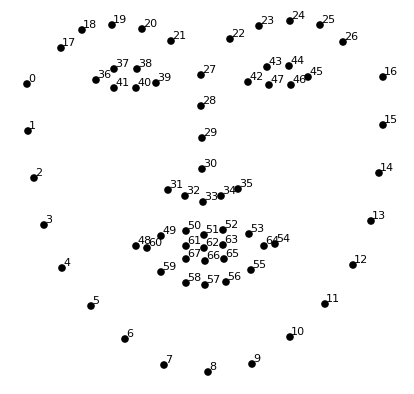

In [1]:
#!pip install opencv_python
#!pip install cmake
#!pip install dlib


import cv2
import matplotlib.pyplot as plt
import numpy as np

import os
import dlib


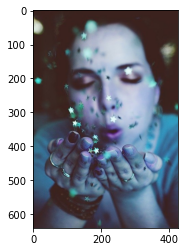

In [2]:
my_girls_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/girls.jpg'
img_girls_bgr = cv2.imread(my_girls_image_path)    #- OpenCV로 이미지를 읽어서
img_girls_bgr = cv2.resize(img_girls_bgr, (426, 640))    
img_girls_show = img_girls_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_girls_bgr)
plt.show()

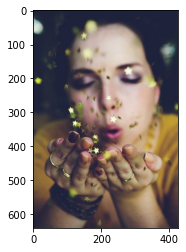

In [3]:
img_girls_rgb = cv2.cvtColor(img_girls_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_girls_rgb)
plt.show()

In [4]:
detector_hog = dlib.get_frontal_face_detector()   

In [5]:
img_girls_rgb = cv2.cvtColor(img_girls_bgr, cv2.COLOR_BGR2RGB)
dlib_girls_rects = detector_hog(img_girls_rgb, 1)

rectangles[[(63, 99) (384, 420)]]


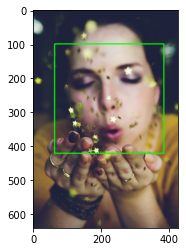

In [6]:
print(dlib_girls_rects)   # 찾은 얼굴영역 좌표

for dlib_girls_rect in dlib_girls_rects:
    l = dlib_girls_rect.left()
    t = dlib_girls_rect.top()
    r = dlib_girls_rect.right()
    b = dlib_girls_rect.bottom()

    cv2.rectangle(img_girls_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_girls_show_rgb =  cv2.cvtColor(img_girls_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_girls_show_rgb)
plt.show()

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
for dlib_girls_rect in dlib_girls_rects:
    points = landmark_predictor(img_girls_rgb, dlib_girls_rect)
    list_girls_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_girls_points)

print(len(list_landmarks[0]))

68


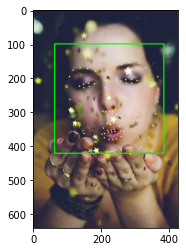

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_girls_points):
        cv2.circle(img_girls_show, point, 2, (0, 255, 255), -1) # yellow

img_girls_show_rgb = cv2.cvtColor(img_girls_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_girls_show_rgb)
plt.show()

In [10]:
for dlib_girls_rect, landmark in zip(dlib_girls_rects, list_landmarks):
    print (landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1] #+ (landmark[33][1] - landmark[33][1]) // 2  
    w = dlib_girls_rect.width()
    h = dlib_girls_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(224, 298)
(x,y) : (224,298)
(w,h) : (322,322)


(322, 322, 3)


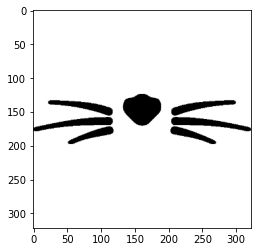

In [11]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [12]:
refined_x = x - w // 2  # left
refined_y = y - h // 2 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (63,137)


In [13]:
print(img_sticker.shape[0], img_sticker.shape[1], img_sticker.shape[2])

322 322 3


In [14]:
refined_x, refined_x + img_sticker.shape[1],refined_y, refined_y + img_sticker.shape[1]

(63, 385, 137, 459)

In [15]:
sticker_area = img_girls_bgr[refined_y:refined_y + img_sticker.shape[0], \
                        refined_x:refined_x + img_sticker.shape[1]]

print(sticker_area.shape, img_sticker.shape,refined_x, refined_x + img_sticker.shape[0])

img_girls_bgr[refined_y:refined_y + img_sticker.shape[0], \
              refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

(322, 322, 3) (322, 322, 3) 63 385


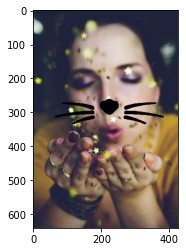

In [16]:
plt.imshow(cv2.cvtColor(img_girls_bgr, cv2.COLOR_BGR2RGB))
plt.show()

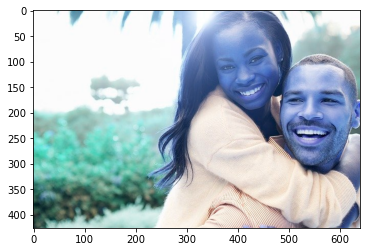

In [17]:
my_couple_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/couple.jpg'
img_couple_bgr = cv2.imread(my_couple_image_path)    #- OpenCV로 이미지를 읽어서
img_couple_bgr = cv2.resize(img_couple_bgr, (640, 426))    
img_couple_show = img_couple_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_couple_bgr)
plt.show()

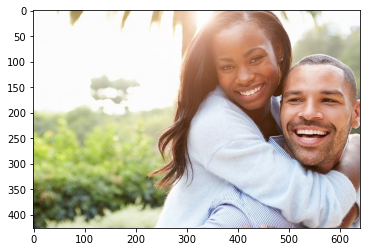

In [18]:
img_couple_rgb = cv2.cvtColor(img_couple_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_couple_rgb)
plt.show()

In [19]:
detector_hog = dlib.get_frontal_face_detector()   

In [20]:
img_couple_rgb = cv2.cvtColor(img_couple_bgr, cv2.COLOR_BGR2RGB)
dlib_couple_rects = detector_hog(img_couple_rgb, 1)

rectangles[[(459, 133) (614, 288)], [(354, 67) (483, 196)]]


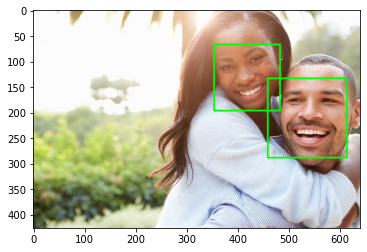

In [21]:
print(dlib_couple_rects)   # 찾은 얼굴영역 좌표

for dlib_couple_rect in dlib_couple_rects:
    l = dlib_couple_rect.left()
    t = dlib_couple_rect.top()
    r = dlib_couple_rect.right()
    b = dlib_couple_rect.bottom()

    cv2.rectangle(img_couple_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_couple_show_rgb =  cv2.cvtColor(img_couple_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_couple_show_rgb)
plt.show()

In [22]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [23]:
list_landmarks = []
for dlib_couple_rect in dlib_couple_rects:
    points = landmark_predictor(img_couple_rgb, dlib_couple_rect)
    list_couple_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_couple_points)

print(len(list_landmarks[0]))

68


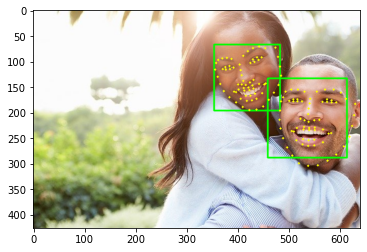

In [24]:
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_couple_show, point, 2, (0, 255, 255), -1) # yellow

img_couple_show_rgb = cv2.cvtColor(img_couple_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_couple_show_rgb)
plt.show()

In [25]:
614-459

155

In [26]:
loc = []
w_h = []

for dlib_couple_rect, landmark in zip(dlib_couple_rects, list_landmarks):
    print (landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1]
    
    print(x, y)
    
    w = dlib_couple_rect.width()
    h = dlib_couple_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    w_h.append([w, h])
    loc.append([x, y, w, h])
    
print(loc)

(539, 218)
539 218
(x,y) : (539,218)
(w,h) : (156,156)
(416, 146)
416 146
(x,y) : (416,146)
(w,h) : (130,130)
[[539, 218, 156, 156], [416, 146, 130, 130]]


(156, 156, 3)


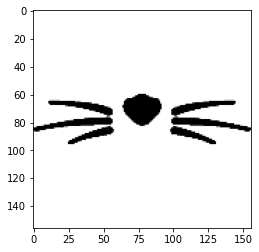

(130, 130, 3)


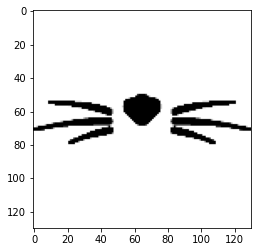

[[156, 156], [130, 130]]


In [27]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)

w, h = w_h[0]
#print(w, h)
img_sticker_0 = cv2.resize(img_sticker, (w, h))
print(img_sticker_0.shape)
plt.imshow(img_sticker_0)
plt.show()    

w, h = w_h[1]
img_sticker_1 = cv2.resize(img_sticker, (w, h))
print(img_sticker_1.shape)

plt.imshow(img_sticker_1)
plt.show()    

    
print(w_h)



(x,y) : (461,140)
(156, 156, 3) (156, 156, 3)
(x,y) : (351,81)
(130, 130, 3)


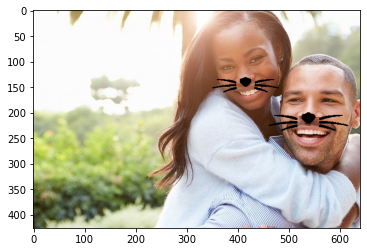

In [28]:
x, y, w, h = loc[0]

#for [x, y, w, h] in loc:
refined_x = x - w // 2  # left
refined_y = y - h // 2 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_couple_bgr[refined_y:refined_y + img_sticker_0.shape[0], \
                        refined_x:refined_x + img_sticker_0.shape[1]]

print(sticker_area.shape, img_sticker_0.shape)
img_couple_bgr[refined_y:refined_y + img_sticker_0.shape[0], \
              refined_x:refined_x + img_sticker_0.shape[1]] = \
    np.where(img_sticker_0==0,img_sticker_0,sticker_area).astype(np.uint8)

x, y, w, h = loc[1]

#for [x, y, w, h] in loc:
refined_x = x - w // 2  # left
refined_y = y - h // 2 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

sticker_area = img_couple_bgr[refined_y:refined_y + img_sticker_1.shape[0], \
                        refined_x:refined_x + img_sticker_1.shape[1]]

print(sticker_area.shape)
img_couple_bgr[refined_y:refined_y + img_sticker_1.shape[0], \
              refined_x:refined_x+img_sticker_1.shape[1]] = \
    np.where(img_sticker_1==0,img_sticker_1,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_couple_bgr, cv2.COLOR_BGR2RGB))
plt.show()


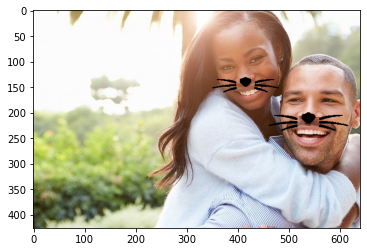

In [29]:
plt.imshow(cv2.cvtColor(img_couple_bgr, cv2.COLOR_BGR2RGB))
plt.show()